# Trabajo 1: Pablo Ascorbe Fernández

## 1. Lectura y análisis del dataset "risk_factors_cervical_cancer"

In [ ]:
import pandas as pd
df = pd.read_csv('risk_factors_cervical_cancer.csv', delimiter=',', na_values='?')
df.head(15)

Vemos que algunas variables tienen una cantidad ingente de valores faltantes, comprobemos cuantos son:

In [4]:
print()
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Ya vemos que casi todas las columnas tienen valores faltantes y que dos de ellas tienen demasiados.

Veamos ahora los datos generales del dataset:

In [5]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos comprobar que hay un monton de variables con espurios o valores extremos, donde la media y la mediana distan bastante. Además, también vemos que los rangos entre las diferentes variables son muy dispares, de modo que será interesante normalizar.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

También vemos que todas las variables son numéricas.

Antes de terminar con este apartado podría ser interesante si está balanceada nuestra variable target:

In [20]:
df.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

Vemos que efectivamente está realmente desbalanceada.

## 2. Preprocesado

### 2.1. Valores Únicos

Comprobamos si alguna variable tiene un solo valor y de ser así podríamos eliminarla:

In [21]:
import numpy as np

df.nunique()

Age                                   44
Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       40
IUD                                    2
IUD (years)                           26
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:AIDS                              1
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV        

Vemos que efectivamente es así, hay varias que cuentan con un único valor, las eliminamos:

In [33]:
criterio = (df.nunique() == 1)
df[criterio.index[criterio]]

,STDs:cervical condylomatosis,STDs:AIDS
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
853,0.0,0.0
854,0.0,0.0
855,0.0,0.0
856,0.0,0.0


Ahí tenemos las dos columnas, ahora las vamos a borrar:

In [67]:
criterio = (df.nunique() != 1)

df = df.iloc[:,np.array(criterio)]

In [58]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Vemos que ya no están.

### 2.2. Valores Duplicados

Primero comprobamos si hay duplicados, y de ser así los eliminamos:

In [59]:
dups = df.duplicated()
print(dups.any())

True


In [68]:
print("Con duplicados: ",df.shape)
df.drop_duplicates(inplace=True, keep='first')
print("Sin duplicados: ",df.shape)

Con duplicados:  (858, 34)
Sin duplicados:  (835, 34)


### 2.3. VarianceThreshold

Ahora vamos a comprobar qué variables tienen una varianza muy muy pequeña, lo cual implicaría que estuvieran muy cerca de tener un solo valor, y de ser necesario eliminarlas también.

Primero, separamos las variables explicativas de la explicada:

In [69]:
data = df.values
X = data[:,:-1]
y = data[:,-1]
print(X.shape, y.shape)

(835, 33) (835,)


Y procedemos a comprobar las varianzas de cada variable:

In [70]:
from sklearn.feature_selection import VarianceThreshold
thresholds = np.arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)

>Threshold=0.00, Features=33
>Threshold=0.05, Features=19
>Threshold=0.10, Features=14
>Threshold=0.15, Features=12
>Threshold=0.20, Features=12
>Threshold=0.25, Features=11
>Threshold=0.30, Features=11
>Threshold=0.35, Features=10
>Threshold=0.40, Features=10
>Threshold=0.45, Features=10
>Threshold=0.50, Features=10


Vemos que dependiendo del umbral llegaríamos a eliminar hasta 23 variables, vemos que el intervalo más crítico se encuentra entre el 0 y el 0.05, vamos a iterar ahí:

In [71]:
thresholds = np.arange(0.0, 0.06, 0.01)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)

>Threshold=0.00, Features=33
>Threshold=0.01, Features=27
>Threshold=0.02, Features=26
>Threshold=0.03, Features=21
>Threshold=0.04, Features=21
>Threshold=0.05, Features=19


Viendo esto, hay que tomar una decisión, podemos eliminar aquellas que se salgan de un umbral muy pequeño como 0.01 o 0.02 o no eliminar ninguna. Y en este caso, como es evidente que tenemos muchas variables poco dispersas y muy concentradas, vamos a eliminar aquellas que se salgan del umbral de 0.01:

In [77]:
vt = VarianceThreshold(threshold = 0.01).fit(df).get_support()
df = df.loc[:, vt]

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


### 2.4. Valores Nulos

Ahora vamos a determinar qué hacer con los valores nulos, imputarlo o eliminarlos:

Vemos qué variables tienen nulos y qué porcentaje de estos hay:

In [78]:
for i in df.columns:
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %s, Faltantes: %d (%.1f%%)' % (i, n_miss, perc))

> Age, Faltantes: 0 (0.0%)
> Number of sexual partners, Faltantes: 25 (3.0%)
> First sexual intercourse, Faltantes: 7 (0.8%)
> Num of pregnancies, Faltantes: 56 (6.7%)
> Smokes, Faltantes: 13 (1.6%)
> Smokes (years), Faltantes: 13 (1.6%)
> Smokes (packs/year), Faltantes: 13 (1.6%)
> Hormonal Contraceptives, Faltantes: 103 (12.3%)
> Hormonal Contraceptives (years), Faltantes: 103 (12.3%)
> IUD, Faltantes: 112 (13.4%)
> IUD (years), Faltantes: 112 (13.4%)
> STDs, Faltantes: 100 (12.0%)
> STDs (number), Faltantes: 100 (12.0%)
> STDs:condylomatosis, Faltantes: 100 (12.0%)
> STDs:vulvo-perineal condylomatosis, Faltantes: 100 (12.0%)
> STDs:syphilis, Faltantes: 100 (12.0%)
> STDs:HIV, Faltantes: 100 (12.0%)
> STDs: Number of diagnosis, Faltantes: 0 (0.0%)
> STDs: Time since first diagnosis, Faltantes: 764 (91.5%)
> STDs: Time since last diagnosis, Faltantes: 764 (91.5%)
> Dx:Cancer, Faltantes: 0 (0.0%)
> Dx:CIN, Faltantes: 0 (0.0%)
> Dx:HPV, Faltantes: 0 (0.0%)
> Dx, Faltantes: 0 (0.0%)
> Hi

Vemos que casi todas las variables tienen nulos, y que sobre todo llama la atención las variables con un 91% de nulos. Esas quizá sea mejor eliminarlas, y el resto impurtar los valores faltantes:

In [80]:
df.dropna(axis=1, thresh=int(0.1*len(df)))

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


Hecho, ahora procedemos a comprobar qué estrategia de imputado es más interesante para nuestro caso:

Separamos explicativas de explicada:

In [81]:
data = df.values
X = data[:,:-1]
y = data[:,-1]
print(X.shape, y.shape)

(835, 27) (835,)


Y ahora, para comprobar qué estrategia de imputación es la más adecuada, veamos el accuracy de "RandomForest" por defecto y lo comparamos con las distintas estrategias:

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 899, in check_array
    _assert_all_finite(
  File "C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 146, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


Vemos que no podemos calcular dicho acurracy porque, como ya sabemos, nuestro dataset tiene NaN, así que vamos a probar a eliminar todos los NaN y ver dicho resultado, y luego el resto de estrategias:

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

aux = df.copy()
aux.dropna(inplace=True)


data = aux.values
X = data[:,:-1]
y = data[:,-1]

model = RandomForestClassifier()

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Mean Accuracy: 0.894 (0.080)


Vemos que obtenemos un 0.894, veamos le resto de estrategias:

In [84]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

data = df.values
X = data[:,:-1]
y = data[:,-1]

model = RandomForestClassifier()
strategies = ['mean', 'median', 'most_frequent', 'constant']  
for s in strategies:
    
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score="raise")
    
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

(835, 27) (835,)
>mean 0.946 (0.018)
>median 0.950 (0.016)
>most_frequent 0.951 (0.016)
>constant 0.948 (0.015)


Podemos comprobar que para "RandomForest" imputar valores faltantes, antes que eliminarlos, es una muy buena estrategia en nuestro caso, vemos que lo mejor será usar la moda o la mediana.
<br> <br>
Ahora, vamos a probar algún modelo más, para comprobar que esta casuistica se repite:

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

aux = df.copy()
aux.dropna(inplace=True)


data = aux.values
X = data[:,:-1]
y = data[:,-1]

model = LogisticRegression()

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.870 (0.072)


C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [87]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

data = df.values
X = data[:,:-1]
y = data[:,-1]

model = LogisticRegression()
strategies = ['mean', 'median', 'most_frequent', 'constant']  
for s in strategies:
    
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score="raise")
    
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

>mean 0.952 (0.020)
>median 0.953 (0.019)
>most_frequent 0.950 (0.018)
>constant 0.951 (0.019)


Recordemos que no estamos ajustando ningún hiperparámetros, esto es con el modelo por defecto. Y vemos, que en este caso, la regresión logística es algo mejor que "RandomFores", pasando de 0.951 a 0.953; tampoco es mucho, pero sí suficiente.
<br><br>
Vamos a probar un último modelo:

In [88]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

aux = df.copy()
aux.dropna(inplace=True)


data = aux.values
X = data[:,:-1]
y = data[:,-1]

model = svm.SVC()

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.850 (0.050)


C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\pablo\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [89]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

data = df.values
X = data[:,:-1]
y = data[:,-1]

model = svm.SVC()
strategies = ['mean', 'median', 'most_frequent', 'constant']  
for s in strategies:
    
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score="raise")
    
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

>mean 0.935 (0.006)
>median 0.935 (0.006)
>most_frequent 0.935 (0.006)
>constant 0.935 (0.006)


Por último, vamos a probar una estrategia basada en la imputación a través de los vecinos más próximos, y lo haremos para regresión logística, ya que será el modelo que usaremos a partir de ahora, visto que es el que mejor resultados nos ha dado:

In [90]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression

data = df.values
X = data[:,:-1]
y = data[:,-1]

results = list()
model = LogisticRegression()

strategies = [i for i in range(1,22,2)]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=s)), ('m',model)])
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

>1 0.953 (0.017)
>3 0.949 (0.019)
>5 0.952 (0.018)
>7 0.951 (0.018)
>9 0.953 (0.018)
>11 0.954 (0.020)
>13 0.952 (0.022)
>15 0.953 (0.022)
>17 0.952 (0.019)
>19 0.953 (0.021)
>21 0.950 (0.021)


Vemos que imputando teniendo los 11 vecinos más cercanos en cuenta logramos superar ligeramente a la imputación por la moda.

Vamos a imputar dicho valores y guardarlos en el dataset:

In [93]:
imputer = KNNImputer(n_neighbors=11)

df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

for i in df.columns:
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %s, Faltantes: %d (%.1f%%)' % (i, n_miss, perc))

> Age, Faltantes: 0 (0.0%)
> Number of sexual partners, Faltantes: 0 (0.0%)
> First sexual intercourse, Faltantes: 0 (0.0%)
> Num of pregnancies, Faltantes: 0 (0.0%)
> Smokes, Faltantes: 0 (0.0%)
> Smokes (years), Faltantes: 0 (0.0%)
> Smokes (packs/year), Faltantes: 0 (0.0%)
> Hormonal Contraceptives, Faltantes: 0 (0.0%)
> Hormonal Contraceptives (years), Faltantes: 0 (0.0%)
> IUD, Faltantes: 0 (0.0%)
> IUD (years), Faltantes: 0 (0.0%)
> STDs, Faltantes: 0 (0.0%)
> STDs (number), Faltantes: 0 (0.0%)
> STDs:condylomatosis, Faltantes: 0 (0.0%)
> STDs:vulvo-perineal condylomatosis, Faltantes: 0 (0.0%)
> STDs:syphilis, Faltantes: 0 (0.0%)
> STDs:HIV, Faltantes: 0 (0.0%)
> STDs: Number of diagnosis, Faltantes: 0 (0.0%)
> STDs: Time since first diagnosis, Faltantes: 0 (0.0%)
> STDs: Time since last diagnosis, Faltantes: 0 (0.0%)
> Dx:Cancer, Faltantes: 0 (0.0%)
> Dx:CIN, Faltantes: 0 (0.0%)
> Dx:HPV, Faltantes: 0 (0.0%)
> Dx, Faltantes: 0 (0.0%)
> Hinselmann, Faltantes: 0 (0.0%)
> Schiller,

### 2.5. Identificación de Outliers

En este apartado comprobamos outliers o espurios (datos imposibles). Para ello vamos primero a ver la distribución de los datos, y que mejor que con un gráfico de violines:

Age


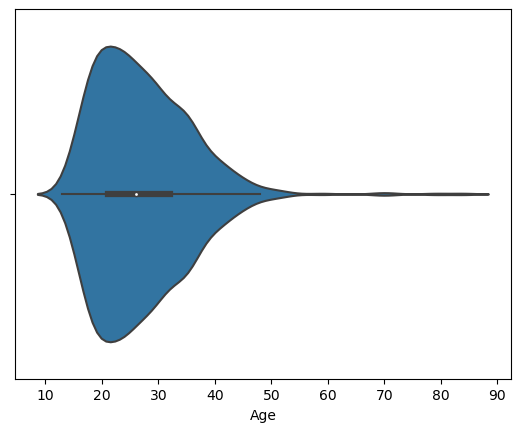

Number of sexual partners


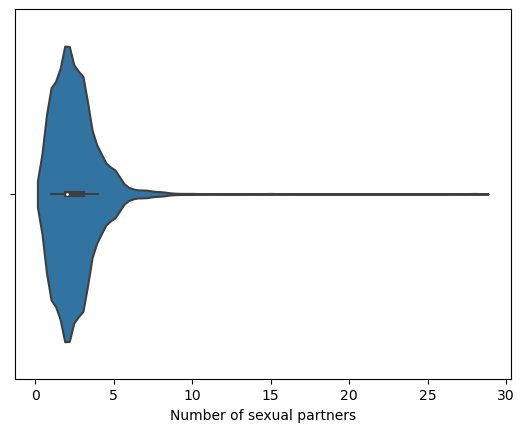

First sexual intercourse


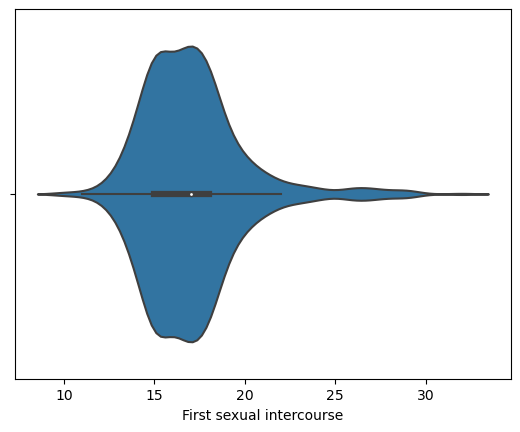

Num of pregnancies


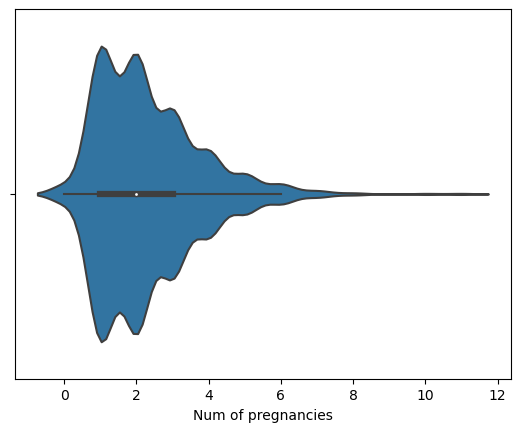

Smokes


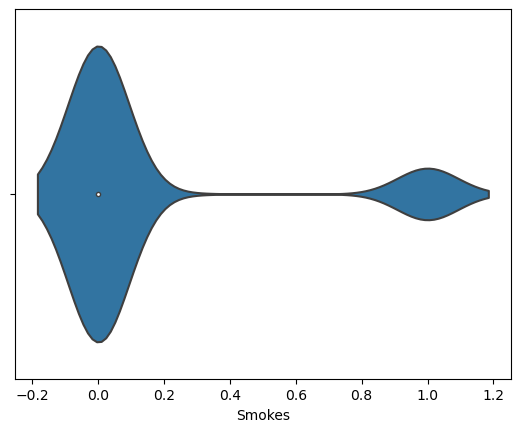

Smokes (years)


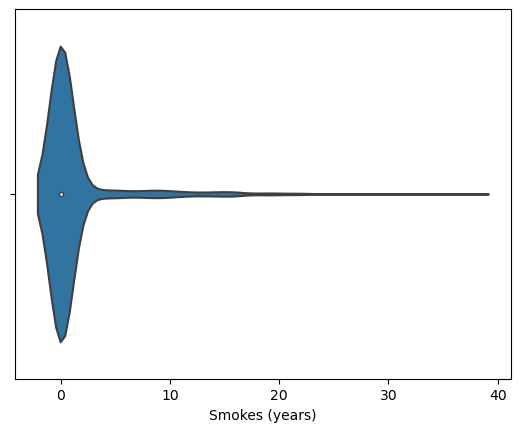

Smokes (packs/year)


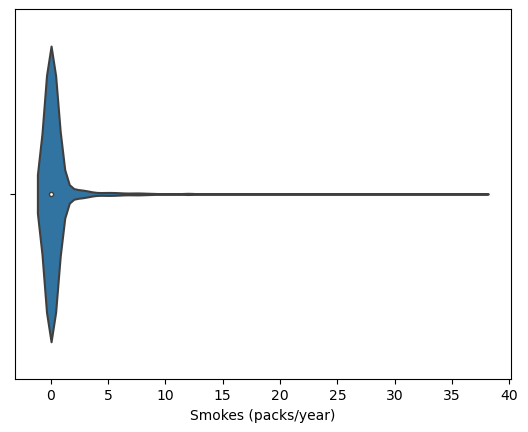

Hormonal Contraceptives


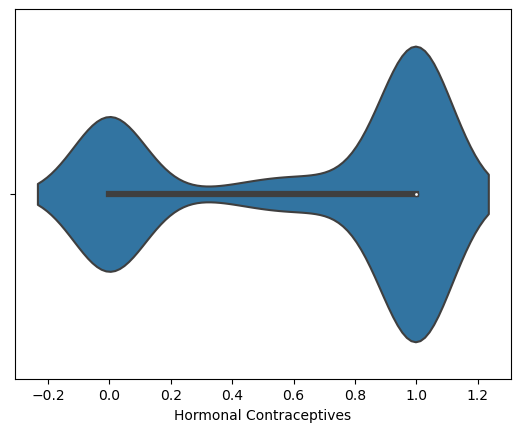

Hormonal Contraceptives (years)


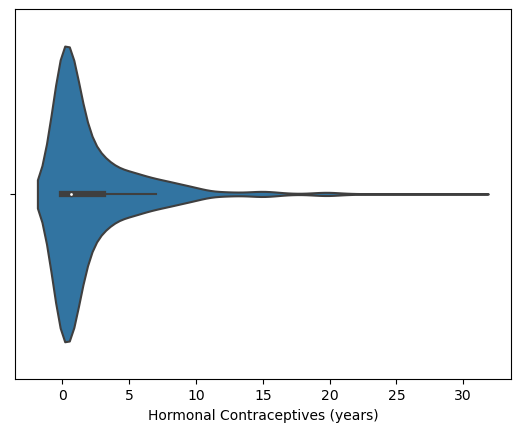

IUD


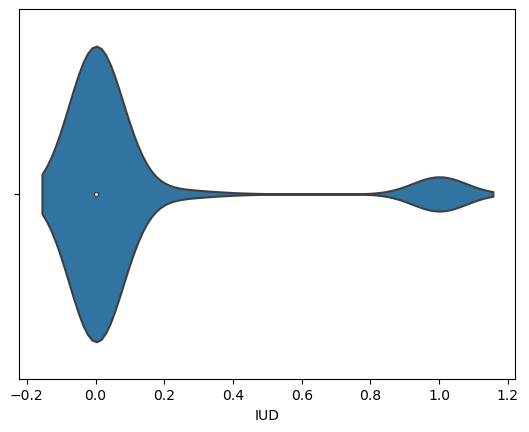

IUD (years)


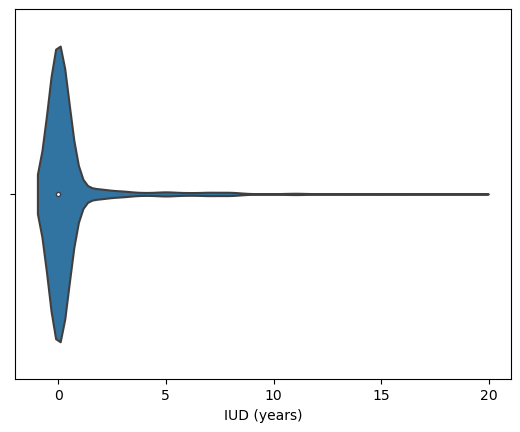

STDs


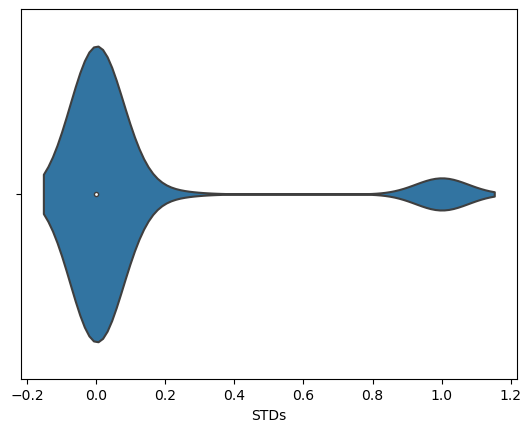

STDs (number)


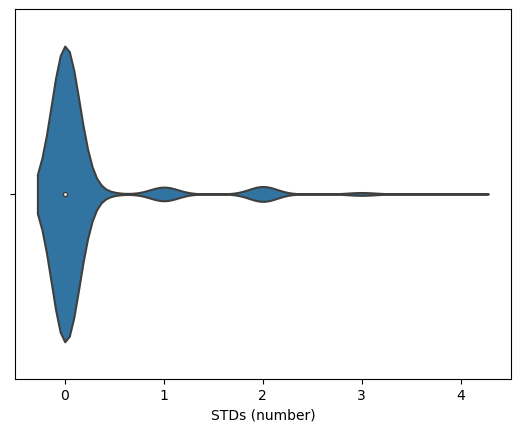

STDs:condylomatosis


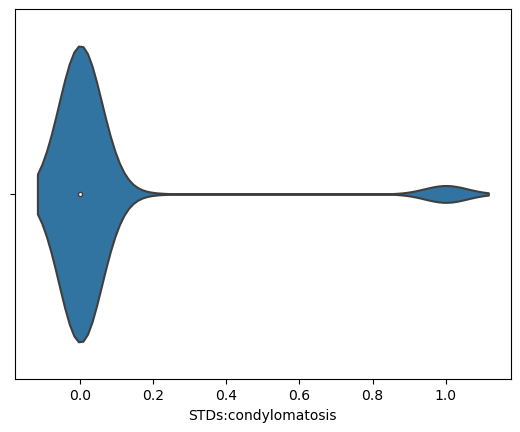

STDs:vulvo-perineal condylomatosis


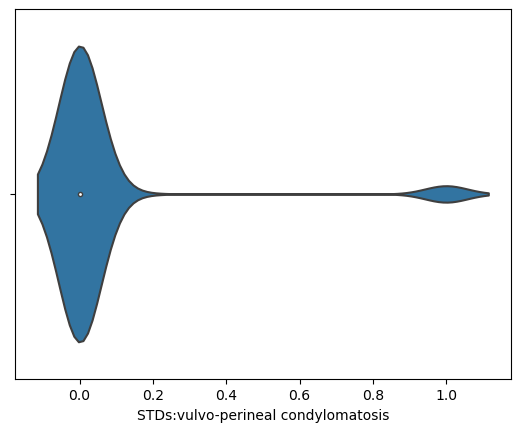

STDs:syphilis


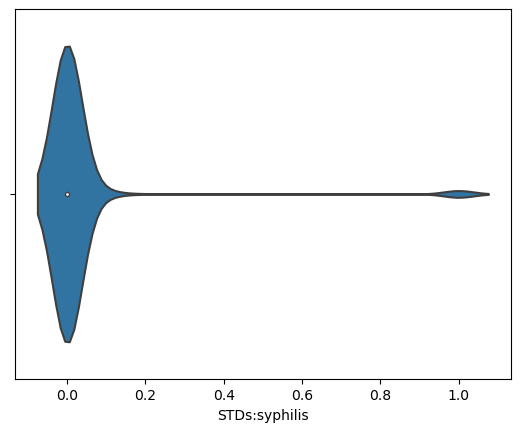

STDs:HIV


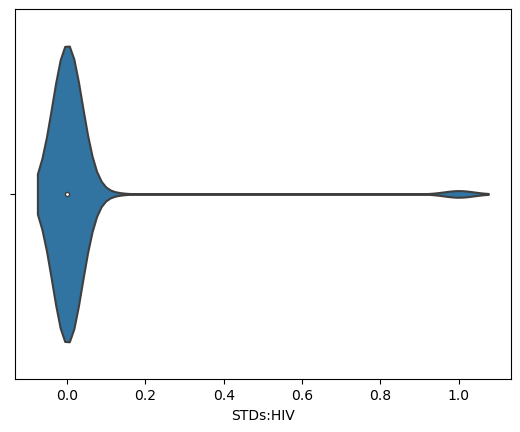

STDs: Number of diagnosis


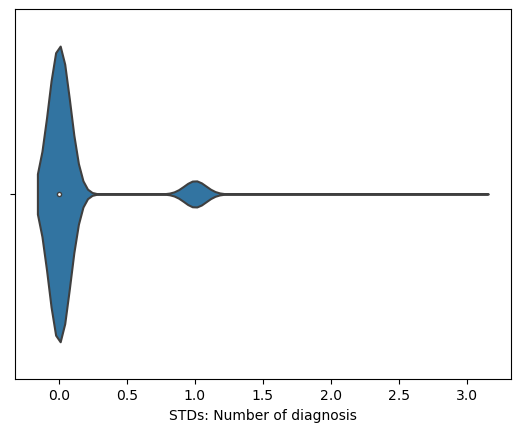

STDs: Time since first diagnosis


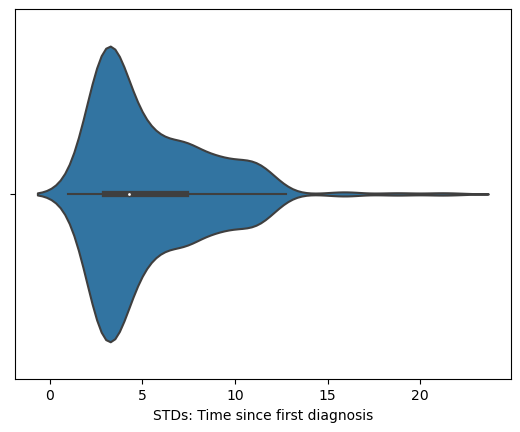

STDs: Time since last diagnosis


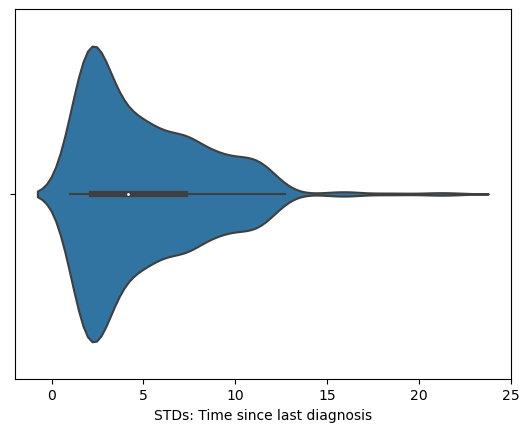

Dx:Cancer


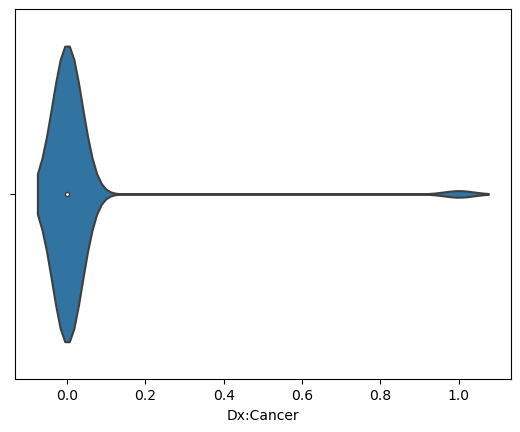

Dx:CIN


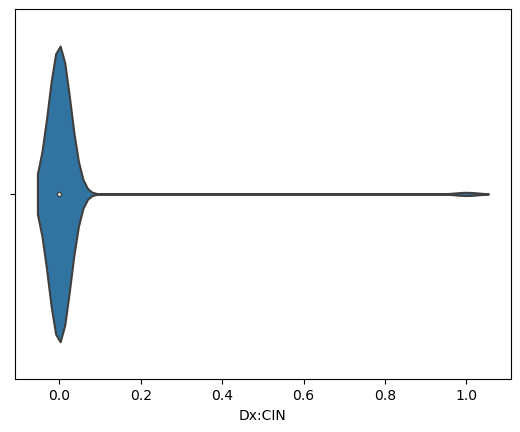

Dx:HPV


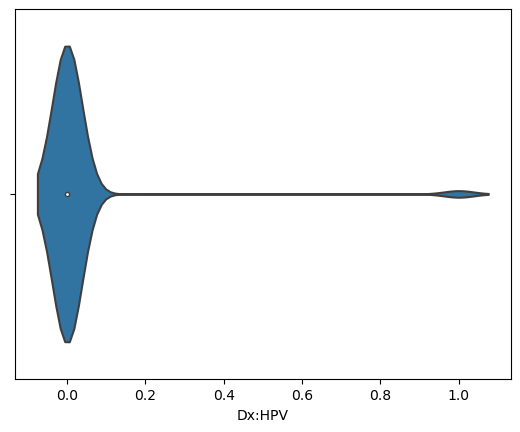

Dx


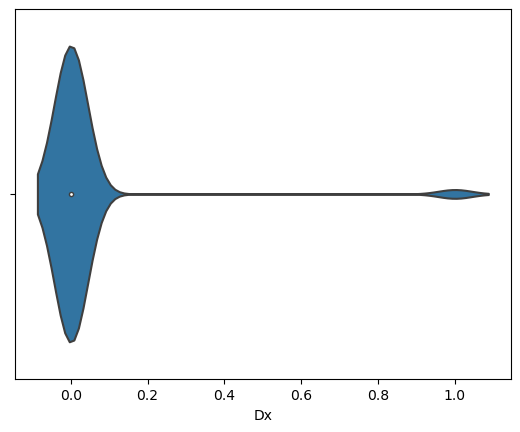

Hinselmann


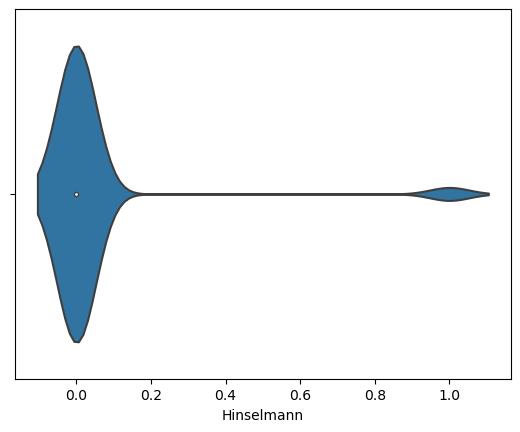

Schiller


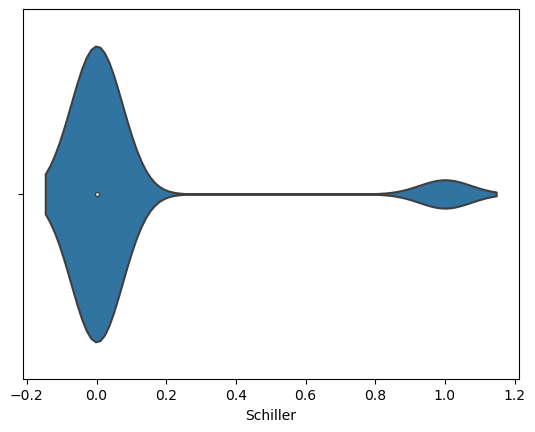

Citology


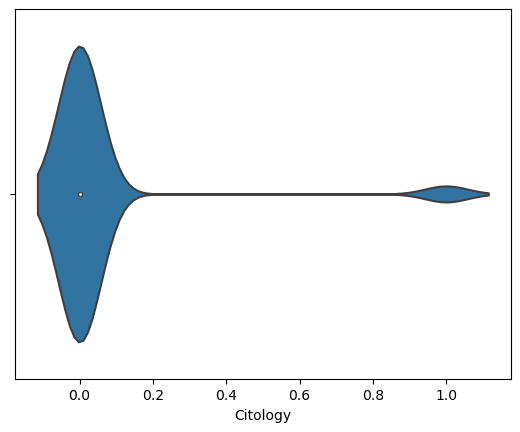

Biopsy


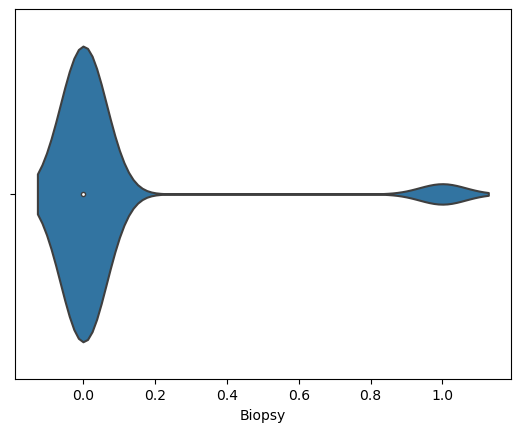

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt


for column in df:
    print(column)
    plt.figure()
    sns.violinplot(data=df, x=column)
    plt.show()

Vemos que muchas variables tienen muchos expurios o valores extremos, sobre todo en la zona derecha, es decir, en los máximos. También hay otras tantas que tienen solos valores 0 o 1 y esas poco sentido tienen tenerlas en cuenta.

Creo que para algunas de las variables no tiene sentido eliminar los valores extremos. Por ejemplo, la gente que fuma, es una variable que merece ser tenida en cuenta, ya que la implicación con el cáncer es elevada, pero al haber poca gente con tabaquismo o fumadora pues se eliminan estos casos. O la variable de edades y cualquiera que tenga valores que sean o 0 o 1.

Aún así vamos a probar a eliminar dichos valores "extremos":

In [110]:
for i in df.columns[:-1]:
    print(i)
    datos = df[[i]].values
    
    q25, q75 = np.percentile(datos, 25), np.percentile(datos, 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in datos if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

Age
Percentiles: 25th=21.000, 75th=32.000, IQR=11.000
Identified outliers: 11
Number of sexual partners
Percentiles: 25th=2.000, 75th=3.000, IQR=1.000
Identified outliers: 69
First sexual intercourse
Percentiles: 25th=15.000, 75th=18.000, IQR=3.000
Identified outliers: 41
Num of pregnancies
Percentiles: 25th=1.000, 75th=3.000, IQR=2.000
Identified outliers: 10
Smokes
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 134
Smokes (years)
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 134
Smokes (packs/year)
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 134
Hormonal Contraceptives
Percentiles: 25th=0.000, 75th=1.000, IQR=1.000
Identified outliers: 0
Hormonal Contraceptives (years)
Percentiles: 25th=0.000, 75th=3.000, IQR=3.000
Identified outliers: 69
IUD
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 131
IUD (years)
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 131
STDs
Percentiles: 25th

Vemos que, como deciamos, en variables como: si fuma o no, la edad o cuantas parejas ha tenido encuentra outliers, cosa que sinceramente no tiene sentido.

Ahora veamos la detección de outliers con LocalOutlierFactor:

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

data = df.values
X = data[:,:-1]
y = data[:,-1]

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
yhat = yhat[yhat == -1]
len(yhat)

83

Vemos que encuentra 83 outliers, y podemos comprobar qué pasa si los eliminamos, para ver si mejora o no nuestros resultados:

In [143]:
data = df.values
X = data[:,:-1]
y = data[:,-1]

results = list()
model = LogisticRegression()

strategies = [i for i in range(1,22,2)]
for s in strategies:
    
    lof = LocalOutlierFactor(n_neighbors = s)
    yhat = lof.fit_predict(X)
    X = X[yhat == 1]
    y = y[yhat == 1]
    
    pipeline = Pipeline([('m',model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

>1 0.959 (0.015)
>3 0.959 (0.015)
>5 0.962 (0.016)
>7 0.965 (0.018)
>9 0.963 (0.014)
>11 0.965 (0.019)
>13 0.964 (0.017)
>15 0.964 (0.017)
>17 0.965 (0.018)
>19 0.965 (0.015)
>21 0.963 (0.016)


Vemos que hemos mejorado ligeramente el resultado, recordemos que pasamos de 0.953 a 0.965. Probemos con RandomForest:

In [144]:
from sklearn.ensemble import RandomForestClassifier

data = df.values
X = data[:,:-1]
y = data[:,-1]

results = list()
model = RandomForestClassifier()

strategies = [i for i in range(1,22,2)]
for s in strategies:
    
    lof = LocalOutlierFactor(n_neighbors = s)
    yhat = lof.fit_predict(X)
    X = X[yhat == 1]
    y = y[yhat == 1]
    
    pipeline = Pipeline([('m',model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

>1 0.960 (0.014)
>3 0.961 (0.016)
>5 0.961 (0.017)
>7 0.969 (0.018)
>9 0.966 (0.016)
>11 0.967 (0.019)
>13 0.966 (0.017)
>15 0.966 (0.015)
>17 0.968 (0.019)
>19 0.966 (0.017)
>21 0.966 (0.016)


Vemos que también mejora y que en ambos el número de vecinos para esta estrategia es 17. Así que usemos estos X e y sin outliers para la última parte:

In [145]:
data = df.values
X = data[:,:-1]
y = data[:,-1]

lof = LocalOutlierFactor(n_neighbors = 17)
yhat = lof.fit_predict(X)
X = X[yhat == 1]
y = y[yhat == 1]

### 2.6. Balanceo de los datos

Ya hemos aplicado casi todas las técnicas vistas en la asignatura hasta el momento sobre, imputación de nulos, eliminación de duplicados, comprobación de espurios...
Ahora vamos a ver si balanceando la clase objetivo obtenemos mejor resultado:

Para ello vamos a utilizar una técnica llamada SMOTE:

In [113]:
pip install imblearn

     -------------------------------------- 226.0/226.0 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [146]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

model = LogisticRegression()

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.952 (0.011)


Vemos que empeora un poco. Vamos a probarlo también para RandomForest:

In [147]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

model = RandomForestClassifier()

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.987 (0.009)


Vemos que obtenemos un 0.987 con todos los pasos precedidos anteriormente. Y con este habríamos terminado la fase de preprocesado. Vemos que a algunos modelos les sientan mejor ciertas estrategias y a otros otras. Por ejemplo, esta última, el balanceo, a la regresión logística le ha sentado peor y a RandomForest muy bien.

## Conclusión

Para terminar este trabajo, voy a juntar todo lo que hemos aplicado en durante el mismo y ver el resultado final directamente:

In [4]:
import pandas as pd
import numpy as np
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

#Leemos
df = pd.read_csv('risk_factors_cervical_cancer.csv', delimiter=',', na_values='?')
#Eliminamos aquellas columnas que solo tienen un solo valor
criterio = (df.nunique() != 1)
df = df.iloc[:,np.array(criterio)]
#Eliminamos duplicados
df.drop_duplicates(inplace=True, keep='first')
#Eliminamos los que tienen una varianza muy reducida
vt = VarianceThreshold(threshold = 0.01).fit(df).get_support()
df = df.loc[:, vt]
#Eliminamos las columnas con un número muy elevado de NaN
df.dropna(axis=1, thresh=int(0.1*len(df)))
#Imputamos los valores faltanten con los 11 vecinos más cercanos
imputer = KNNImputer(n_neighbors=11)
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
#Eliminamos los outliers con los 17 vecinos más cercanos
data = df.values
X = data[:,:-1]
y = data[:,-1]

lof = LocalOutlierFactor(n_neighbors = 17)
yhat = lof.fit_predict(X)
X = X[yhat == 1]
y = y[yhat == 1]
#Balanceamos las clases objetivo
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#Creamos el modelo por defecto
model = RandomForestClassifier()
#Entrenamos y evaluamos
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.986 (0.009)


Listo, hecho. La verdad que con estas tres técnicas: Imputación de valores desconocidos, eliminación de únicos, repetidos, varianza pequeña, extremos o nulos y balanceo de la clase objetivo conseguimos una muy buena accuracy. Seguramente si siguieramos aplicando otras técnicas como "feature engineering", estandarización y normalización o cambios en las distribuciones mejoraríamos algo más.
<br><br>
Pues listo, ha sido todo un placer realizar este trabajo y poner en práctica todas estas técnicas que realmente marcan la diferencia en el workflow del machine learning.

In [2]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
